<a href="https://colab.research.google.com/github/joseangelmx/detector-de-billetes-monedas/blob/main/Reto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hola mi proyecto para este reto 3 es una red neuronal capaz de detectar el valor de las monedas y billetes que tengan las imagenes,Hasta el momento solamente detecta pesos mexicanos,Esta Red Neuronal la entrene usando custom vision y usando diversas imagenes de billetes y monedas**



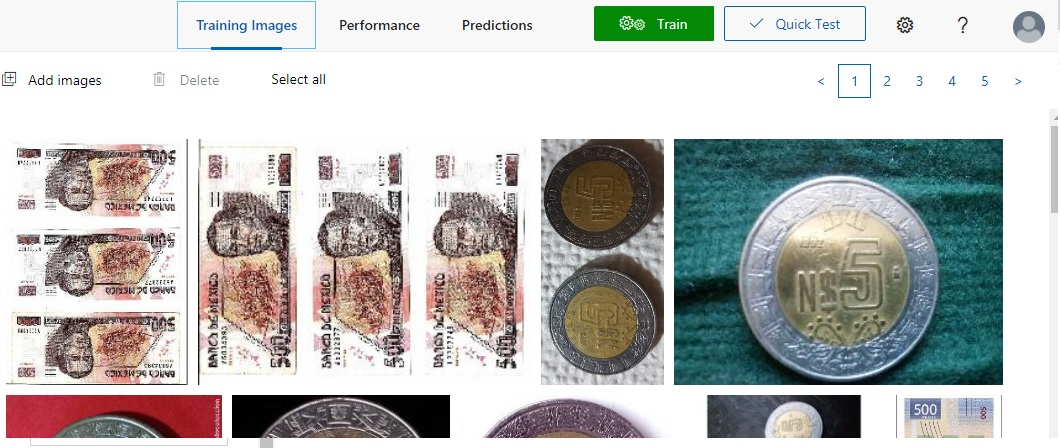

Primero instalamos los servicios de azure custom vision

In [67]:
pip install azure-cognitiveservices-vision-customvision -q

importamos las librerias y tambien introducimos nuestras claves de prediccion del proyecto,Asi tambien como la iteracion a la que corresponde el entrenamiento

In [75]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
prediction_key="449c551dbec44fae8bfe11277f0fa83e"
ENDPOINT="https://southcentralus.api.cognitive.microsoft.com"
project_id="e857dc60-6a14-455d-855a-5fe1da8d44e3"
publish_iteration_name = "Iteration5"


Con este codigo se hara uso de nuestra red neuronal para detectar los billetes y monedas en la imagen.

In [80]:
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(ENDPOINT, prediction_credentials)
with open("/content/descarga (6).jpg",mode="rb")as test_data: results = predictor.detect_image(project_id, publish_iteration_name, test_data)
for prediction in results.predictions: 
  if (prediction.probability * 100)>29:
     print("\t" + prediction.tag_name + """":{0:.2f}% bbox.left={1:.2f},bbox.top={2:.2f},bbox.width={3:.2f},bbox.height={4:.2f}""".format(prediction.probability * 100, prediction.bounding_box.left, prediction.bounding_box.top, prediction.bounding_box.width, prediction.bounding_box.height))


	Billete 100 pesos":91.47% bbox.left=0.03,bbox.top=0.02,bbox.width=0.32,bbox.height=0.46
	Billete de 1000 pesos":91.26% bbox.left=0.05,bbox.top=0.51,bbox.width=0.27,bbox.height=0.48
	Billete de 20 pesos":89.91% bbox.left=0.69,bbox.top=0.12,bbox.width=0.26,bbox.height=0.37
	Billete de 200 pesos":87.60% bbox.left=0.66,bbox.top=0.52,bbox.width=0.32,bbox.height=0.47
	Billete 500 pesos":75.63% bbox.left=0.37,bbox.top=0.51,bbox.width=0.29,bbox.height=0.47
	Billete 50 pesos":74.30% bbox.left=0.36,bbox.top=0.11,bbox.width=0.29,bbox.height=0.36


La imagen que se uso para esta prueba es la siguiente.

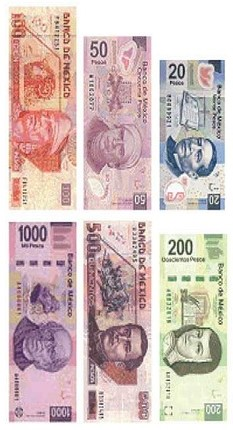